In [2]:

import gym
from gym.envs.registration import register
from gym.envs.toy_text.frozen_lake import generate_random_map


env_name = 'FrozenLake-v0'
size = 8

random_map = generate_random_map(size=size, p=0.8)
env = gym.make(env_name, desc=random_map, is_slippery = False)
#env = gym.make(env_name)
env.reset()
env.render()



SFFFFHHF
FHFFFFFF
HFFFFFFF
HHFFFHFF
FFFFFFFF
HFFFFFFF
HFFFFFFF
FFHFFFFG


In [3]:
# function for displaying a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
def display_value_iteration(P, V, env = env):
    nb_states = env.observation_space.n
    visited_states = np.zeros(nb_states).astype(bool)
    visited_states[0] = 1
    states_labels = np.where(P==0, '<', 
                              np.where(P==1, '>', 
                                       np.where(P==2, 'v', 
                                                np.where(P==3, '^', P)
                                               )
                                      )
                             ) 
    desc = env.unwrapped.desc.ravel().astype(str)
    colors = np.where(desc=='S','y',np.where(desc=='F','b',np.where(desc=='H','r',np.where(desc=='G','g',desc))))
    states_labels = np.zeros(nb_states).astype(str)
    states_labels[:] = ''
    iter_no = 1
    total_reward = 0
    s = env.reset()
    done = False
    while done != True:
        best_a = P[s] # select the best next action from the policy
        states_labels[s] = '^' if best_a==0 else ('v' if best_a==1 else ('>' if best_a==2 else '<'))           
        s, rew, done, info = env.step(best_a) #take step using selected action
        print(iter_no, s, P[s], best_a, s, rew, done, info)
        total_reward = total_reward + rew
        #visited_states[s] = 1 # mark the state as visited
        iter_no += 1
        #env.render()
    plt.figure(figsize=(20,10)) 
    ax = sns.heatmap(P.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 linewidth=0.5, 
                 annot=states_labels.reshape(int(np.sqrt(nb_states)),int(np.sqrt(nb_states))), 
                 cmap=list(colors),
                 fmt = '',
                 cbar=False)
    plt.show()
    print("Total Reward: ", total_reward, " ",iter_no)
    

In [4]:
# value iteration algorithm
import seaborn as sns
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import gym
from gym import wrappers
from gym.envs.toy_text.frozen_lake import generate_random_map

def compute_value_iteration(
        #env = gym.make('FrozenLakeNotSlippery-v0'),
        env,
        gamma, v_delta_threshold=.001,
        V = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    if V == None:
        V = np.zeros([nb_states])
    # policy vector
    P = np.zeros([nb_states], dtype=int)
    Reward = np.zeros([nb_states], dtype=int)
    iteration = 0
    while True:

        v_delta = 0
        for s in range (0, nb_states):
            v_previous = V[s]
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward
            env.env.s = s # go to the state s
            s_next, r, done, info = env.step(a_best) #take the best action
            V[s] = r + gamma * V[s_next] # update the value of the state
            P[s] = a_best # store the best action in the policy vector for the state
            v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state
        iteration += 1
        if v_delta < v_delta_threshold:
            if verbose:
                print ('Value : ',iteration,' iterations done')
            break
    return V, P

# compute values for a 4x4 board
gamma = 0.8
V_4, P_4 = compute_value_iteration(env, gamma)
print("V ",V_4)
print("P ",P_4)

#env = gym.make('FrozenLakeNotSlippery-v0')
desc = env.unwrapped.desc.ravel().astype(str)
env.render()
desc

Value :  15  iterations done
V  [0.05497558 0.06871948 0.08589935 0.10737418 0.13421773 0.
 0.         0.262144   0.04398047 0.         0.10737418 0.13421773
 0.16777216 0.2097152  0.262144   0.32768    0.         0.10737418
 0.13421773 0.16777216 0.2097152  0.262144   0.32768    0.4096
 0.         0.         0.16777216 0.2097152  0.262144   0.
 0.4096     0.512      0.13421773 0.16777216 0.2097152  0.262144
 0.32768    0.4096     0.512      0.64       0.         0.2097152
 0.262144   0.32768    0.4096     0.512      0.64       0.8
 0.         0.262144   0.32768    0.4096     0.512      0.64
 0.8        1.         0.16777216 0.2097152  0.         0.512
 0.64       0.8        1.         0.        ]
P  [2 2 1 1 1 0 0 1 3 0 1 1 1 1 1 1 0 2 1 1 1 2 1 1 0 0 1 1 1 0 1 1 2 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 2 3 0 2 2 2 2 0]
  (Left)
SFFFFHHF
FHFFFFFF
HFFFFFFF
HHFFFHFF
FFFFFFFF
HFFFFFFF
HFFFFFFF
FFHFFFFG


array(['S', 'F', 'F', 'F', 'F', 'H', 'H', 'F', 'F', 'H', 'F', 'F', 'F',
       'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H',
       'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'G'],
      dtype='<U1')

In [5]:
# function for performing policy iteration
def compute_policy_iteration(env,gamma, v_delta_threshold=.01,P = None, verbose=True):
    env.reset()
    nb_actions = env.action_space.n
    nb_states = env.observation_space.n
    # values vector
    V = np.zeros([nb_states])
    # policy vector
    if P == None:
        P = np.random.choice(nb_actions, size=nb_states)
        
    max_iterations = 200000
    iteration = 0
    for i in range(max_iterations):
        
        # policy evaluation
        while True:
            v_delta = 0
            for s in range (0, nb_states):
                v_previous = V[s]                
                env.env.s = s # go to state s
                s_next, r, done, info = env.step(P[s]) #take the action recommended by policy
                V[s] = r + gamma * V[s_next] # update value after applying policy
                v_delta = max(v_delta, np.abs(v_previous - V[s])) # calculate the rate of value improvment for the state
            if v_delta < v_delta_threshold:
                break

        # policy improvement
        policy_stable = True
        for s in range (0, nb_states):
            a_old = P[s] # ask policy for action to perform
            a_best = choose_best_action(env, V, s, gamma) # find an action with the highest future reward    
            P[s] = a_best # store the best action in the policy vector for the state
            if a_old != a_best:
                policy_stable = False
        
        if policy_stable:
            break
                
        iteration += 1
    if verbose:
        print ('Policy : ',iteration,' iterations done')    
    return V, P
    
Vp_4, Pp_4 = compute_policy_iteration(env,gamma)
Vp_4
#display_value_iteration(Pp_4)
print("Vp ",Vp_4)
print("Pp ",Pp_4)

#env = gym.make('FrozenLakeNotSlippery-v0')
desc = env.unwrapped.desc.ravel().astype(str)
env.render()
desc

Policy :  14  iterations done
Vp  [0.05497558 0.06871948 0.08589935 0.10737418 0.13421773 0.
 0.         0.262144   0.04398047 0.         0.10737418 0.13421773
 0.16777216 0.2097152  0.262144   0.32768    0.         0.10737418
 0.13421773 0.16777216 0.2097152  0.262144   0.32768    0.4096
 0.         0.         0.16777216 0.2097152  0.262144   0.
 0.4096     0.512      0.13421773 0.16777216 0.2097152  0.262144
 0.32768    0.4096     0.512      0.64       0.         0.2097152
 0.262144   0.32768    0.4096     0.512      0.64       0.8
 0.         0.262144   0.32768    0.4096     0.512      0.64
 0.8        1.         0.16777216 0.2097152  0.         0.512
 0.64       0.8        1.         0.        ]
Pp  [2 2 1 1 1 0 0 1 3 0 1 1 1 1 1 1 0 2 1 1 1 2 1 1 0 0 1 1 1 0 1 1 2 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 2 3 0 2 2 2 2 0]
  (Up)
SFFFFHHF
FHFFFFFF
HFFFFFFF
HHFFFHFF
FFFFFFFF
HFFFFFFF
HFFFFFFF
FFHFFFFG


array(['S', 'F', 'F', 'F', 'F', 'H', 'H', 'F', 'F', 'H', 'F', 'F', 'F',
       'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'H',
       'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'H', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F',
       'F', 'F', 'F', 'F', 'F', 'F', 'H', 'F', 'F', 'F', 'F', 'G'],
      dtype='<U1')

In [6]:
# function for performing value and policy iterations for given gamma
def gammas_training(method, 
                    gammas = np.arange(0, 1, 0.1),
                    env=env):
    df = pd.DataFrame(columns=['gamma','state','value'])
    for gamma in gammas:
        if method == 'value_iteration':
            V, P = compute_value_iteration(env=env, gamma=gamma, verbose=False)
        else:
            V, P = compute_policy_iteration(env=env, gamma=gamma, verbose=False)
        df = df.append(pd.DataFrame({'gamma':[gamma for i in range(0,env.observation_space.n)],
                                'state':[i for i in range(0,env.observation_space.n)],
                                'value': V}))
    df.state=df.state.astype(int)
    return df

Text(0.5, 1.0, 'POLICY ITERATION - Values per gamma')

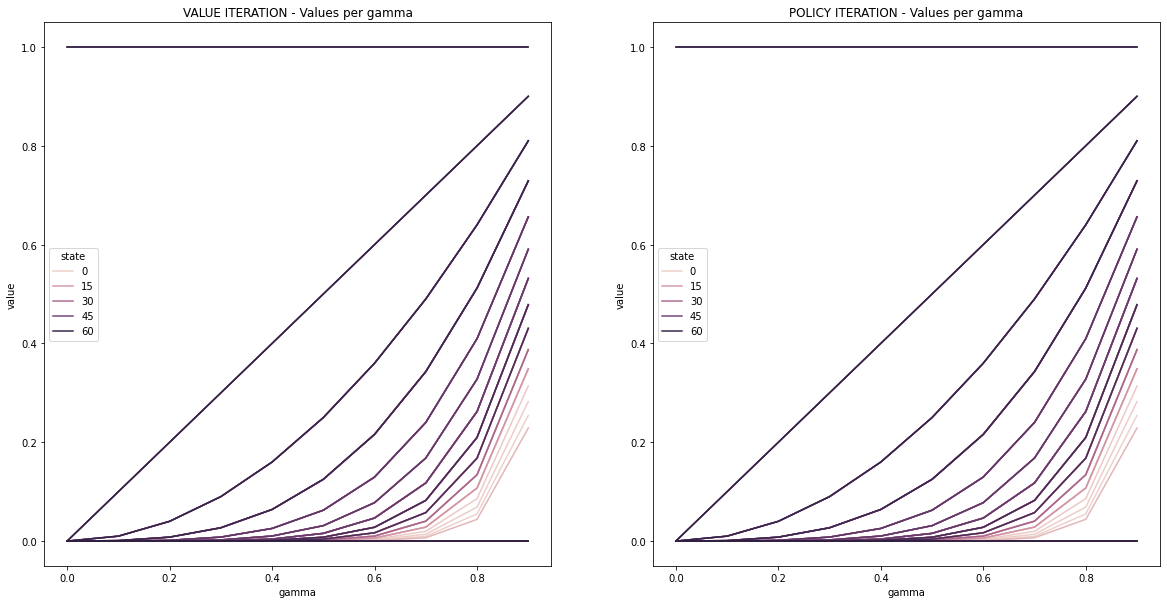

In [7]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
df_4_v = gammas_training(method='value_iteration', env=env)
sns.lineplot(data=df_4_v, x='gamma', y='value', hue='state', ax=ax[0])
ax[0].set_title('VALUE ITERATION - Values per gamma')

df_4_i = gammas_training(method='policy_iteration', env=env)
sns.lineplot(data=df_4_i, x='gamma', y='value', hue='state', ax=ax[1])
ax[1].set_title('POLICY ITERATION - Values per gamma')

P_4  [2 2 1 1 1 0 0 1 3 0 1 1 1 1 1 1 0 2 1 1 1 2 1 1 0 0 1 1 1 0 1 1 2 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 2 3 0 2 2 2 2 0]
V_4  [0.05497558 0.06871948 0.08589935 0.10737418 0.13421773 0.
 0.         0.262144   0.04398047 0.         0.10737418 0.13421773
 0.16777216 0.2097152  0.262144   0.32768    0.         0.10737418
 0.13421773 0.16777216 0.2097152  0.262144   0.32768    0.4096
 0.         0.         0.16777216 0.2097152  0.262144   0.
 0.4096     0.512      0.13421773 0.16777216 0.2097152  0.262144
 0.32768    0.4096     0.512      0.64       0.         0.2097152
 0.262144   0.32768    0.4096     0.512      0.64       0.8
 0.         0.262144   0.32768    0.4096     0.512      0.64
 0.8        1.         0.16777216 0.2097152  0.         0.512
 0.64       0.8        1.         0.        ]
Pp_4  [2 2 1 1 1 0 0 1 3 0 1 1 1 1 1 1 0 2 1 1 1 2 1 1 0 0 1 1 1 0 1 1 2 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 2 2 1 1 1 1 1 2 3 0 2 2 2 2 0]
Vp_4  [0.05497558 0.06871948 0.08589935 0.10737

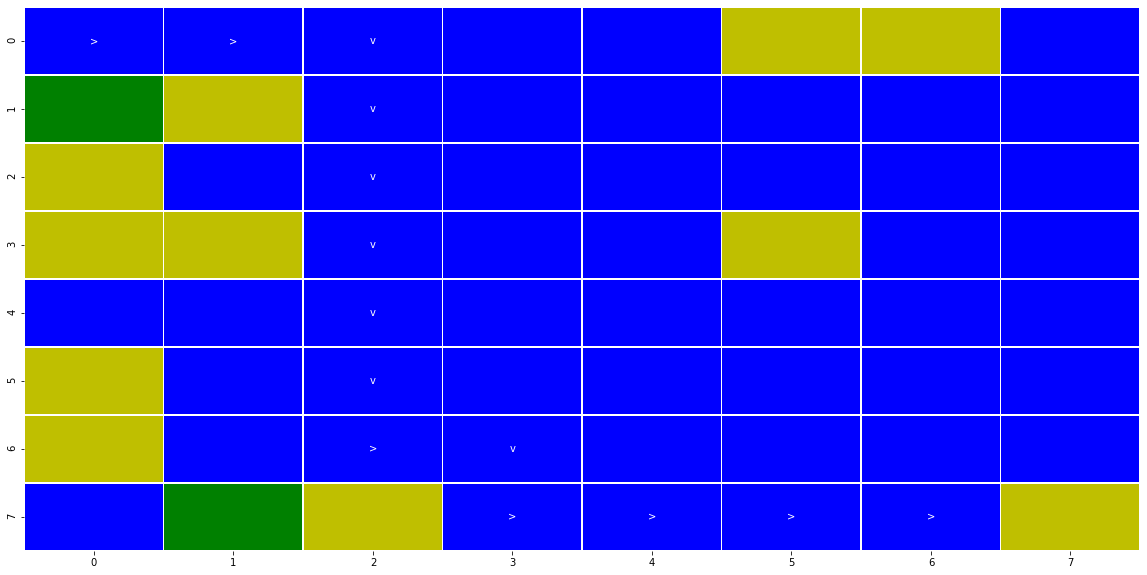

Total Reward:  1.0   15
1 1 2 2 1 0.0 False {'prob': 1.0}
2 2 1 2 2 0.0 False {'prob': 1.0}
3 10 1 1 10 0.0 False {'prob': 1.0}
4 18 1 1 18 0.0 False {'prob': 1.0}
5 26 1 1 26 0.0 False {'prob': 1.0}
6 34 1 1 34 0.0 False {'prob': 1.0}
7 42 1 1 42 0.0 False {'prob': 1.0}
8 50 2 1 50 0.0 False {'prob': 1.0}
9 51 1 2 51 0.0 False {'prob': 1.0}
10 59 2 1 59 0.0 False {'prob': 1.0}
11 60 2 2 60 0.0 False {'prob': 1.0}
12 61 2 2 61 0.0 False {'prob': 1.0}
13 62 2 2 62 0.0 False {'prob': 1.0}
14 63 0 2 63 1.0 True {'prob': 1.0}


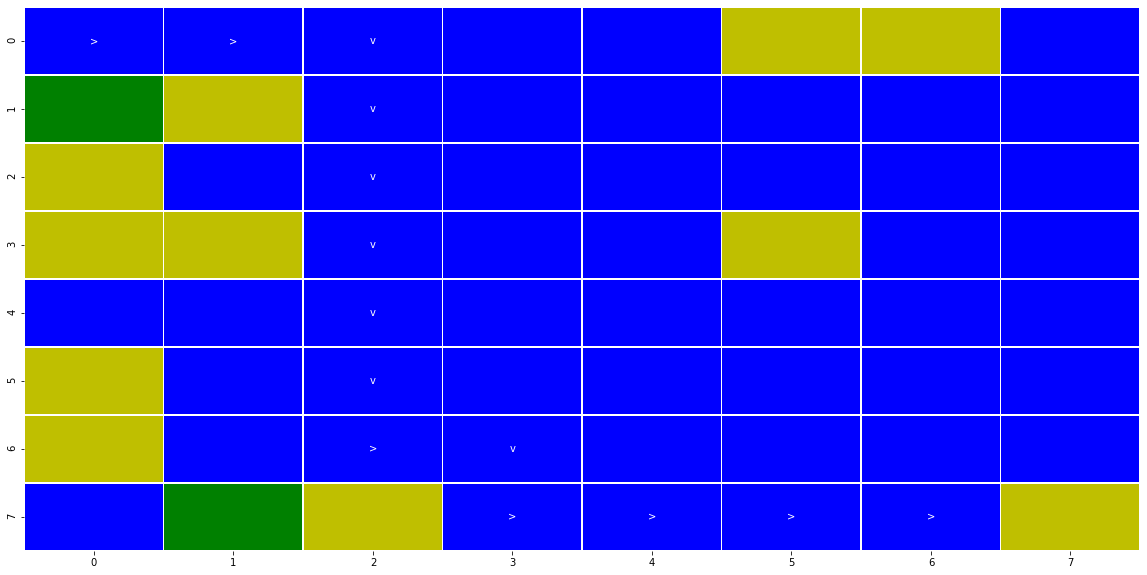

Total Reward:  1.0   15


In [8]:
print("P_4 ", P_4)
print("V_4 ", V_4)
print("Pp_4 ", Pp_4)
print("Vp_4 ", Vp_4)
display_value_iteration(P_4,V_4)
display_value_iteration(Pp_4,Vp_4)

## Q

In [9]:
#https://www.kaggle.com/sarjit07/reinforcement-learning-using-q-table-frozenlake
import torch
import time
import matplotlib.pyplot as plt
# Discount on reward
gamma = 0.95

# Factor to balance the ratio of action taken based on past experience to current situtation
learning_rate = 0.9

In [10]:
# Total number of States and Actions
number_of_states = env.observation_space.n
number_of_actions = env.action_space.n
print( "States = ", number_of_states)
print( "Actions = ", number_of_actions)

num_episodes = 10000
steps_total = []
rewards_total = []
egreedy_total = []

States =  64
Actions =  4


In [11]:
# exploit vs explore to find action
# Start with 70% random actions to explore the environment
# And with time, using decay to shift to more optimal actions learned from experience

egreedy = 0.7
egreedy_final = 0.1
egreedy_decay = 0.01

In [12]:
Q = torch.zeros([number_of_states, number_of_actions])

In [13]:
for i_episode in range(num_episodes):
    
    # resets the environment
    state = env.reset()
    step = 0

    while True:
        
        step += 1
        
        random_for_egreedy = torch.rand(1)[0]
        

        if random_for_egreedy > egreedy:      
            random_values = Q[state] + torch.rand(1,number_of_actions) / 1000      
            action = torch.max(random_values,1)[1][0]  
            action = action.item()
        else:
            action = env.action_space.sample()
            
        if egreedy > egreedy_final:
            egreedy *= egreedy_decay
        
        new_state, reward, done, info = env.step(action)

        # Filling the Q Table
        Q[state, action] = reward + gamma * torch.max(Q[new_state])
        
        # Setting new state for next action
        state = new_state
        
        # env.render()
        # time.sleep(0.4)
        
        if done:
            steps_total.append(step)
            rewards_total.append(reward)
            egreedy_total.append(egreedy)
            if i_episode % 10 == 0:
                print('Episode: {} Reward: {} Steps Taken: {}'.format(i_episode,reward, step))
            break

Episode: 0 Reward: 0.0 Steps Taken: 5
Episode: 10 Reward: 0.0 Steps Taken: 2
Episode: 20 Reward: 0.0 Steps Taken: 4
Episode: 30 Reward: 0.0 Steps Taken: 26
Episode: 40 Reward: 0.0 Steps Taken: 5
Episode: 50 Reward: 0.0 Steps Taken: 4
Episode: 60 Reward: 0.0 Steps Taken: 2
Episode: 70 Reward: 0.0 Steps Taken: 18
Episode: 80 Reward: 0.0 Steps Taken: 4
Episode: 90 Reward: 0.0 Steps Taken: 5
Episode: 100 Reward: 0.0 Steps Taken: 3
Episode: 110 Reward: 0.0 Steps Taken: 17
Episode: 120 Reward: 0.0 Steps Taken: 9
Episode: 130 Reward: 0.0 Steps Taken: 4
Episode: 140 Reward: 0.0 Steps Taken: 4
Episode: 150 Reward: 0.0 Steps Taken: 13
Episode: 160 Reward: 0.0 Steps Taken: 3
Episode: 170 Reward: 0.0 Steps Taken: 2
Episode: 180 Reward: 0.0 Steps Taken: 2
Episode: 190 Reward: 0.0 Steps Taken: 3
Episode: 200 Reward: 0.0 Steps Taken: 8
Episode: 210 Reward: 0.0 Steps Taken: 23
Episode: 220 Reward: 0.0 Steps Taken: 7
Episode: 230 Reward: 0.0 Steps Taken: 3
Episode: 240 Reward: 0.0 Steps Taken: 42
Episo

In [14]:
print(Q)
        
print("Percent of episodes finished successfully: {0}".format(sum(rewards_total)/num_episodes))
print("Percent of episodes finished successfully (last 100 episodes): {0}".format(sum(rewards_total[-100:])/100))

print("Average number of steps: %.2f" % (sum(steps_total)/num_episodes))
print("Average number of steps (last 100 episodes): %.2f" % (sum(steps_total[-100:])/100))

tensor([[0.4877, 0.4633, 0.5133, 0.4877],
        [0.4877, 0.0000, 0.5404, 0.5133],
        [0.5133, 0.5688, 0.5688, 0.5404],
        [0.5404, 0.5987, 0.5404, 0.5688],
        [0.5688, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.4877],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.5987, 0.5987, 0.5404],
        [0.5688, 0.6302, 0.6302, 0.5688],
        [0.0000, 0.6634, 0.6634, 0.5404],
        [0.0000, 0.6302, 0.6983, 0.0000],
        [0.6634, 0.0000, 0.7351, 0.0000],
        [0.6983, 0.7738, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6302, 0.6302, 0.5688],
        [0.5987, 0.6634, 0.6634, 0.5987],
        [0.6302, 0.6983, 0.0000, 0.6302],
        [0.0000, 0.0000, 0.0000, 0.6634],
        [0.0000, 0.0000, 0.0000, 0.6983],
        [0.6634, 0.8145, 0.0000, 0

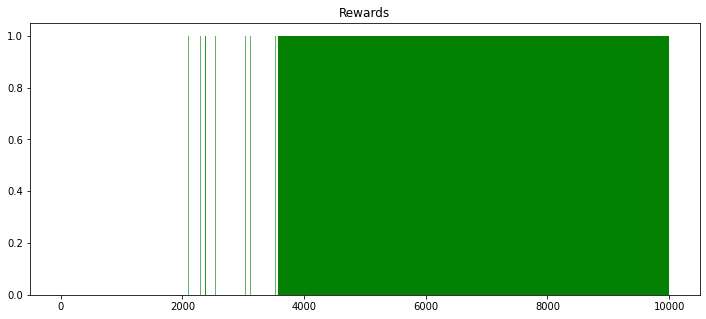

In [15]:
plt.figure(figsize=(12,5))
plt.title("Rewards")
plt.bar(torch.arange(len(rewards_total)), rewards_total, alpha=0.6, color='green', width=5)
plt.show()

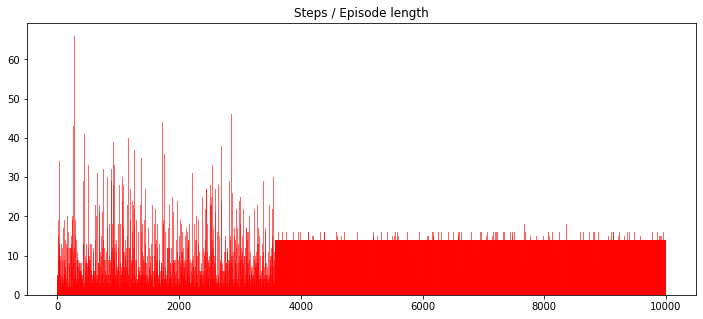

In [16]:
plt.figure(figsize=(12,5))
plt.title("Steps / Episode length")
plt.bar(torch.arange(len(steps_total)), steps_total, alpha=0.6, color='red', width=5)
plt.show()

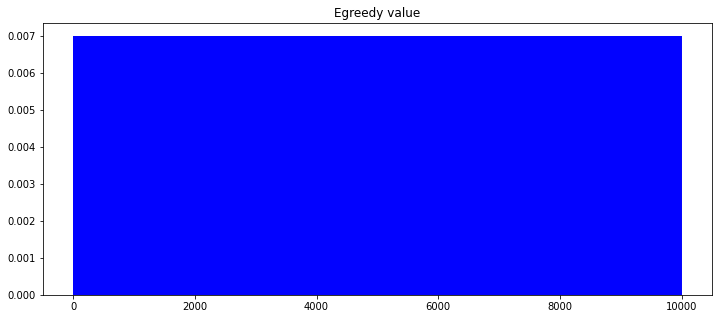

In [17]:
plt.figure(figsize=(12,5))
plt.title("Egreedy value")
plt.bar(torch.arange(len(egreedy_total)), egreedy_total, alpha=0.6, color='blue', width=5)
plt.show()